In [134]:
import numpy as np
import cv2
import os 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

import pickle


In [135]:


# Verilerin bulunduğu yol
base_path = r'C:\Users\cengh\Desktop\dataset\BrainTumor\Training'

# Sınıf isimlerini çıkart
class_names = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]
class_names.sort()  # Sınıfları sıralı hale getirirseniz etiketler daha düzenli olabilir

# Sınıf ismi ve indeksleri eşleştir
label_map = {name: idx for idx, name in enumerate(class_names)}

def load_data(base_path, class_names, img_size=(32, 32)):
    images = []
    labels = []
    for class_name in class_names:
        class_path = os.path.join(base_path, class_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size)
            img = img / 255.0  # Normalizasyon
            images.append(img)
            labels.append(label_map[class_name])
    return np.array(images), np.array(labels)

x_train, y_train = load_data(base_path, class_names)

# Veriyi 4D şekline dönüştür
x_train = x_train.reshape(-1, 32, 32, 1)


y_train = to_categorical(y_train, num_classes=len(class_names))


In [136]:
# Test verilerini yükle
test_base_path = r'C:\Users\cengh\Desktop\dataset\BrainTumor\Testing'
x_test, y_test = load_data(test_base_path, class_names)

# Test verilerini 4D şekline dönüştür
x_test = x_test.reshape(-1, 32, 32, 1)

# One-hot kodlama
y_test = to_categorical(y_test, num_classes=len(class_names))


In [137]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(class_names), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=12, batch_size=32, validation_data=(x_test, y_test))

# Tahminler
predictions = model.predict(x_test)
pickle_out = open("model_trained_new.p","wb")
pickle.dump(model, pickle_out)
pickle_out.close()


Epoch 1/12


c:\Users\cengh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4813 - loss: 1.1550 - val_accuracy: 0.4239 - val_loss: 1.7897
Epoch 2/12
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7362 - loss: 0.6773 - val_accuracy: 0.4594 - val_loss: 2.0773
Epoch 3/12
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8010 - loss: 0.5057 - val_accuracy: 0.5635 - val_loss: 1.9655
Epoch 4/12
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8451 - loss: 0.4254 - val_accuracy: 0.6193 - val_loss: 1.9644
Epoch 5/12
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8731 - loss: 0.3317 - val_accuracy: 0.6701 - val_loss: 2.2992
Epoch 6/12
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9083 - loss: 0.2662 - val_accuracy: 0.6650 - val_loss: 2.3652
Epoch 7/12
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9264 - loss: 0.2137 - val_accuracy: 0.7081 - val_loss: 2.3729
Epoch 8/12
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9426 - loss: 0.1839 - val_accuracy: 0.7030 - val_loss: 2.

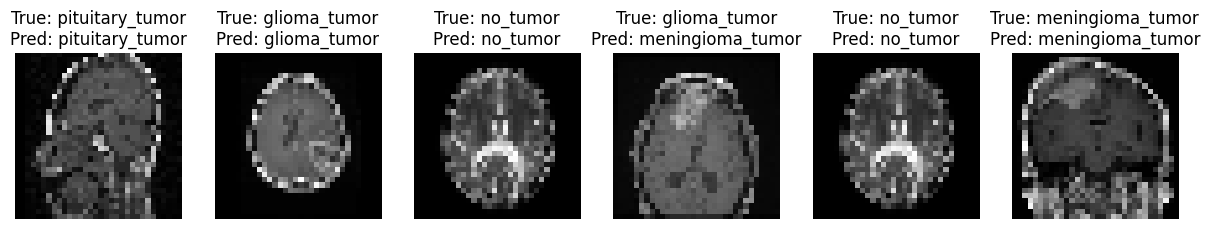

In [141]:


def plot_sample_predictions(x, y_true, y_pred, class_names, num_samples=6):
    # Rastgele örnekler seç
    indices = np.random.choice(range(len(x)), num_samples, replace=False)
    
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 15))
    for i, idx in enumerate(indices):
        ax = axes[i]
        ax.imshow(x[idx].reshape(32, 32), cmap='gray')
        true_label = class_names[np.argmax(y_true[idx])]
        pred_label = class_names[np.argmax(y_pred[idx])]
        ax.set_title(f'True: {true_label}\nPred: {pred_label}')
        ax.axis('off')
    plt.show()

plot_sample_predictions(x_test, y_test, predictions, class_names)


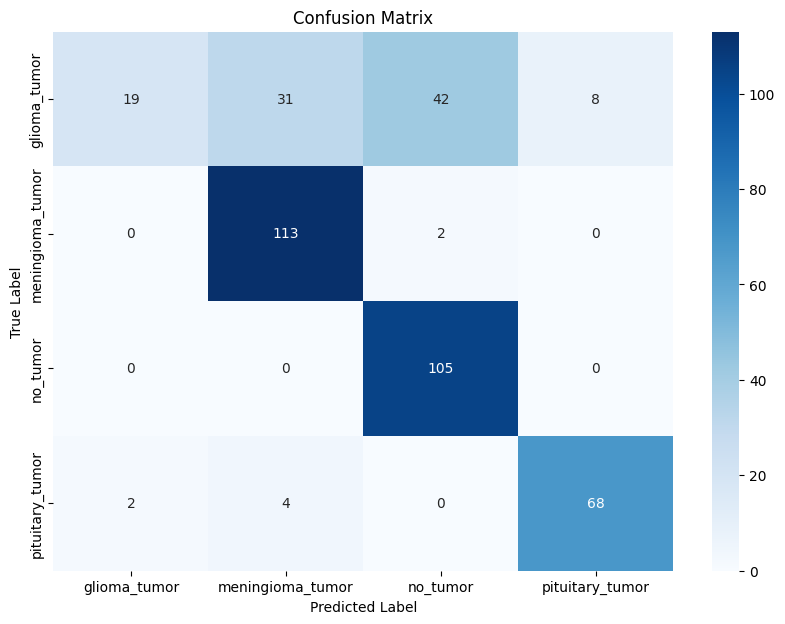

                  precision    recall  f1-score   support

    glioma_tumor       0.90      0.19      0.31       100
meningioma_tumor       0.76      0.98      0.86       115
        no_tumor       0.70      1.00      0.83       105
 pituitary_tumor       0.89      0.92      0.91        74

        accuracy                           0.77       394
       macro avg       0.82      0.77      0.73       394
    weighted avg       0.81      0.77      0.72       394



In [139]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Tahminler
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(predictions, axis=1)

# Karışıklık Matrisi
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=range(len(class_names)))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Sınıflama Raporu
report = classification_report(y_test_labels, y_pred_labels, target_names=class_names)
print(report)


In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')



Accuracy: 0.7741
Precision: 0.8083
Recall: 0.7741
F1 Score: 0.7211
